In [1]:
# Required libraries

import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./mnist_digit.csv/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.shape

(42000, 785)

In [5]:
df['label'].value_counts()/len(df)*100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

In [6]:
# devinding data into independent and dependent
x = df.drop('label',axis=1)
y = df['label']

### Standard scaler

In [7]:
sc = StandardScaler()
sc.fit(x)
x = sc.fit_transform(x)

### Train Test split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

## Model Building

- Before applying PCA

### LogisticRegression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

### SVC

In [ ]:
model_svc = SVC()
model_svc.fit(x_train,y_train)
y_pred = model_svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
print(pca.components_)
print(pca.explained_variance_)
x_pca = pca.transform(x)
x_pca.shape

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df['label'])
plt.show()

### Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

### SVC

In [ ]:
model_svc = SVC()
model_svc.fit(x_train,y_train)
y_pred = model_svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Principal component Analysis

In [8]:
pca = PCA()
xpca = pca.fit_transform(x)
xpca.shape,x.shape

((42000, 784), (42000, 784))

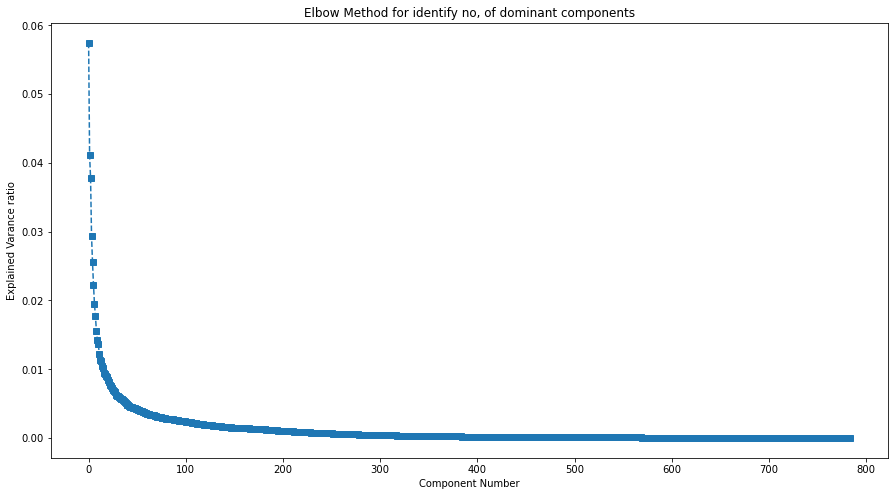

In [9]:
#pca.explained_variance_ # Eigen values of pca
evr = pca.explained_variance_ratio_
plt.figure(figsize=(15,8))
plt.plot(evr,'s--')
plt.xlabel('Component Number')
plt.ylabel('Explained Varance ratio')
plt.title('Elbow Method for identify no, of dominant components')
plt.show()

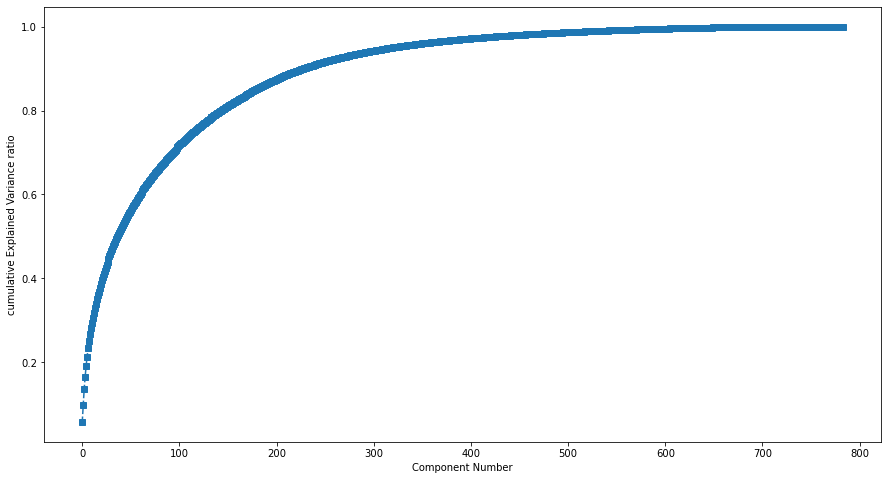

In [10]:
plt.figure(figsize=(15,8))
cuv = np.cumsum(evr)
plt.plot(cuv,'s--')
plt.xlabel('Component Number')
plt.ylabel('cumulative Explained Variance ratio')
plt.show()

In [11]:
# By n_component
pca1 = PCA(n_components=10)
xpca1 = pca1.fit_transform(x)
xpca1.shape

(42000, 10)

In [12]:
# train test split after PCA
x_train,x_test,y_train,y_test = train_test_split(xpca1,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29400, 10), (12600, 10), (29400,), (12600,))

### Logistic Regression

In [13]:
model_lr = None
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7758730158730158
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1256
           1       0.85      0.94      0.89      1428
           2       0.80      0.77      0.78      1258
           3       0.74      0.76      0.75      1280
           4       0.71      0.73      0.72      1212
           5       0.71      0.59      0.65      1111
           6       0.83      0.87      0.85      1220
           7       0.81      0.86      0.84      1352
           8       0.73      0.71      0.72      1234
           9       0.69      0.60      0.64      1249

    accuracy                           0.78     12600
   macro avg       0.77      0.77      0.77     12600
weighted avg       0.77      0.78      0.77     12600



### SVC

In [14]:
model_svc = None
model_svc = SVC()
model_svc.fit(x_train,y_train)
y_pred = model_svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8481746031746031
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1256
           1       0.99      0.97      0.98      1428
           2       0.50      0.98      0.66      1258
           3       0.91      0.80      0.85      1280
           4       0.91      0.79      0.85      1212
           5       0.92      0.80      0.85      1111
           6       0.98      0.85      0.91      1220
           7       0.94      0.83      0.88      1352
           8       0.91      0.76      0.83      1234
           9       0.87      0.79      0.83      1249

    accuracy                           0.85     12600
   macro avg       0.89      0.85      0.86     12600
weighted avg       0.89      0.85      0.86     12600



_________________



___________________